In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [14]:
def add_structure_defect(df):
    df[['structure', 'defect']] = df['particle'].str.split('-',expand=True)
    return df

def print_stats(df):
    print(df[['contrast', 'psnr', 'ssim']].groupby('contrast').agg(['mean', 'std', 'count']))
    print(df[['structure', 'psnr', 'ssim']].groupby('structure').agg(['mean', 'std', 'count']))
    print(df[['defect', 'psnr', 'ssim']].groupby('defect').agg(['mean', 'std', 'count']))

# Contrasts

In [2]:
white = pd.read_csv('../experiments/white_limited/test_evaluation.csv')
black = pd.read_csv('../experiments/black/test_evaluation.csv')
intermediate = pd.read_csv('../experiments/intermediate_limited/test_evaluation.csv')

In [3]:
black.head()

,thickness,tilt_x,tilt_y,defocus,contrast,particle,psnr,ssim
0,50,0,3,0,black,PtNp1-D2,38.700703,0.982404
1,50,0,1,0,black,PtNp3-D0,39.335486,0.986892
2,50,0,2,0,black,PtNp1-D1,38.168966,0.980739
3,30,0,2,1,black,PtNp2-D1,40.666922,0.990051
4,40,0,1,1,black,PtNp3-D1,39.614473,0.987467


In [4]:
white['trained on'] = pd.DataFrame(['white']*len(white))
black['trained on'] = pd.DataFrame(['black']*len(white))
intermediate['trained on'] = pd.DataFrame(['intermediate']*len(white))

In [5]:
data = pd.concat([white, black, intermediate])

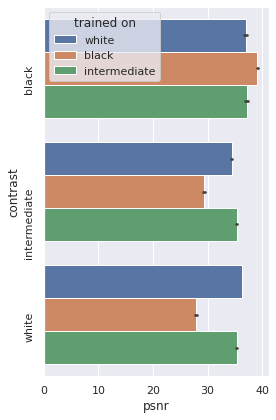

In [6]:
plt.figure(figsize = (4, 6))
g = sns.barplot(y="contrast", x="psnr", hue="trained on", data=data)
plt.yticks(rotation=90)
plt.tight_layout()
# plt.savefig('../images/contrast.pdf')

In [7]:
data[['trained on', 'contrast', 'psnr', 'ssim']].groupby(['trained on','contrast']).agg(['mean', 'std', 'count'])

psnr                      ssim                
                                mean       std count      mean       std count
trained on   contrast                                                         
black        black         39.110390  1.046449   164  0.985465  0.003918   164
             intermediate  29.319217  4.742795  2286  0.905611  0.049519  2286
             white         27.933933  3.701661  1117  0.902882  0.039088  1117
intermediate black         37.180820  1.626311   164  0.978137  0.007661   164
             intermediate  35.335245  1.330458  2286  0.976011  0.008392  2286
             white         35.314475  1.073631  1117  0.978649  0.005174  1117
white        black         36.952373  1.649846   164  0.978665  0.006733   164
             intermediate  34.431239  1.762548  2286  0.971086  0.012823  2286
             white         36.261623  0.900897  1117  0.983955  0.003527  1117

In [8]:
tcontrast = data[['trained on', 'contrast', 'psnr']].groupby(['trained on', 'contrast']).agg('mean').reset_index().pivot('trained on', 'contrast', 'psnr')

In [9]:
plt.rcParams.update({'font.size': 13})

Text(0.5, 21.5, 'tested on')

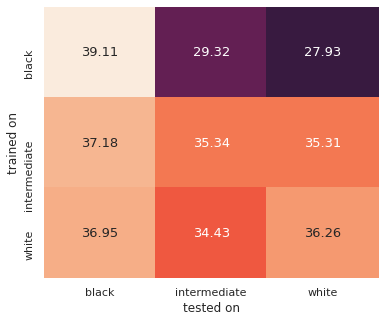

In [11]:
plt.figure(figsize = (6, 5))
sns.heatmap(tcontrast, annot=True, fmt=".2f", vmin = 26, vmax = 39, cbar = False)
plt.xlabel('tested on')
# plt.savefig('../images/contrast-U6.pdf', format='pdf', bbox_inches='tight', pad_inches = 0)

# Structure

In [15]:
defect_path_dict = {
    'PtNp1': '../experiments/structure_white/test_evaluation_1.csv',
    'PtNp2': '../experiments/structure_white/test_evaluation_2.csv',
    'PtNp3': '../experiments/structure_white/test_evaluation_3.csv',
    'PtNp4': '../experiments/structure_white/test_evaluation_4.csv',
}

In [16]:
defect_data_dict = {}
for (key,item) in defect_path_dict.items():
    defect_data_dict[key] = pd.read_csv(item) 
    defect_data_dict[key] = add_structure_defect(defect_data_dict[key])
    defect_data_dict[key]['trained on'] = pd.DataFrame([key]*len(defect_data_dict[key]))

In [17]:
defectdata = pd.concat([defect_data_dict[x] for x in defect_data_dict.keys()])

In [18]:
defectdata = defectdata.loc[defectdata['defect'].isin(['D0', 'D1'])]

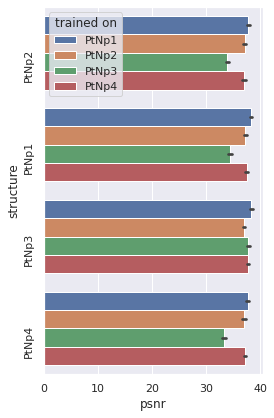

In [19]:
plt.figure(figsize = (4, 6))
g = sns.barplot(y="structure", x="psnr", hue="trained on", data=defectdata)
plt.yticks(rotation=90)
plt.tight_layout()
# plt.savefig('../images/structure.pdf')

In [20]:
tstructure = defectdata[['trained on', 'structure', 'psnr']].groupby(['trained on', 'structure']).agg('mean').reset_index().pivot('trained on', 'structure', 'psnr')

Text(0.5, 21.5, 'tested on')

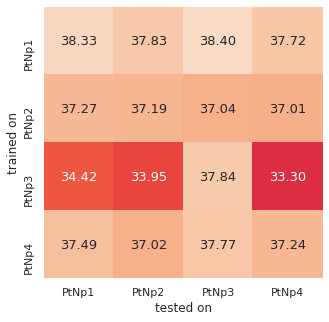

In [21]:
plt.figure(figsize = (5, 5))
sns.heatmap(tstructure, annot=True, fmt=".2f", vmin = 26, vmax = 39, cbar=False)
plt.xlabel('tested on')
# plt.savefig('../images/structure-U6.pdf', format='pdf', bbox_inches='tight', pad_inches = 0)

# Defects

In [22]:
defect_path_dict = {
    'D0': '../experiments/defect_white/test_evaluation_1.csv',
    'D1': '../experiments/defect_white/test_evaluation_2.csv',
    'D2': '../experiments/defect_white/test_evaluation_3.csv',
    'Ds': '../experiments/defect_white/test_evaluation_4.csv',
    'Dh': '../experiments/defect_white/test_evaluation_5.csv',
}

In [23]:
defect_data_dict = {}
for (key,item) in defect_path_dict.items():
    defect_data_dict[key] = pd.read_csv(item) 
    defect_data_dict[key] = add_structure_defect(defect_data_dict[key])
    defect_data_dict[key]['trained on'] = pd.DataFrame([key]*len(defect_data_dict[key]))

In [24]:
defectdata = pd.concat([defect_data_dict[x] for x in defect_data_dict.keys()])

In [25]:
defectdata = defectdata.loc[defectdata['structure'].isin(['PtNp1'])]

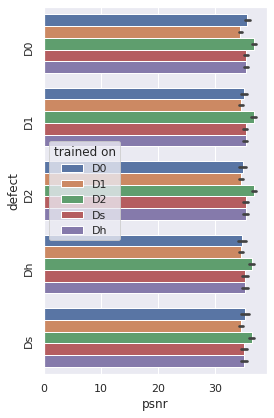

In [26]:
plt.figure(figsize = (4, 6))
g = sns.barplot(y="defect", x="psnr", hue="trained on", data=defectdata, order=['D0', 'D1', 'D2', 'Dh', 'Ds'])
plt.yticks(rotation=90)
plt.tight_layout()
# plt.savefig('../images/defect.pdf')

In [27]:
tdefect = defectdata[['trained on', 'defect', 'psnr']].groupby(['trained on', 'defect']).agg('mean').reset_index().pivot('trained on', 'defect', 'psnr')

In [28]:
plt.rcParams.update({'font.size': 13})

Text(0.5, 21.5, 'tested on')

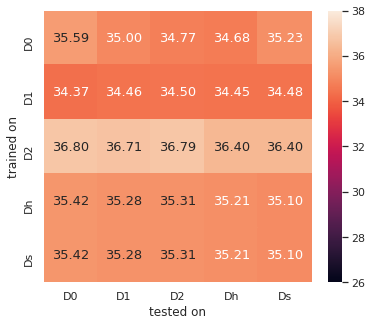

In [30]:
plt.figure(figsize = (6, 5))
sns.heatmap(tdefect, annot=True, fmt=".2f", vmin = 26, vmax = 38)
plt.xlabel('tested on')
# plt.savefig('../images/defect-U6.pdf', format='pdf', bbox_inches='tight', pad_inches = 0)